# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [32]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

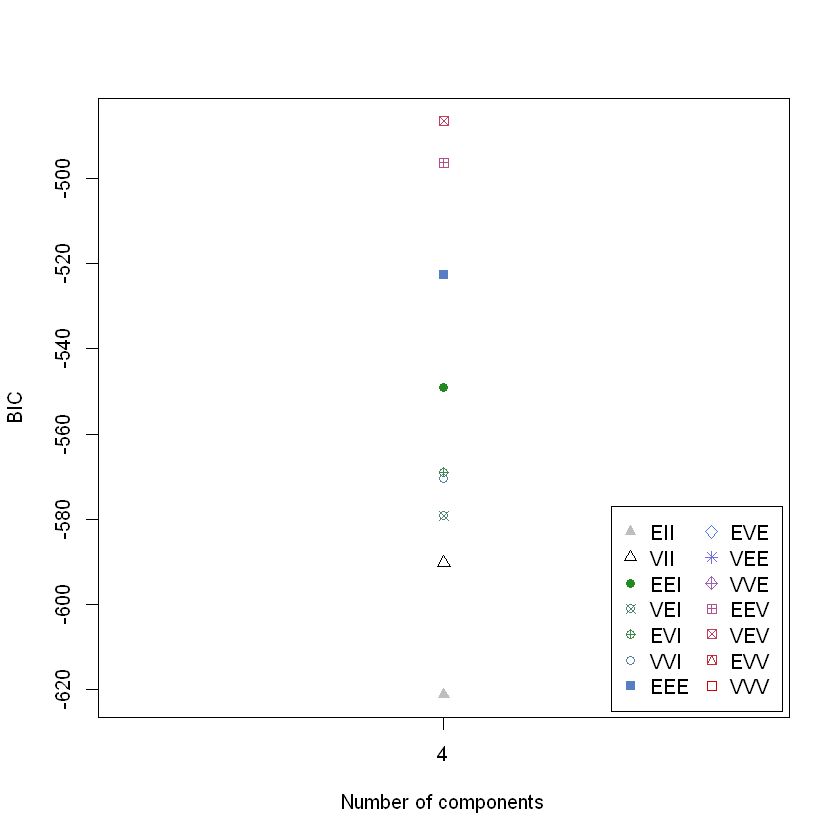

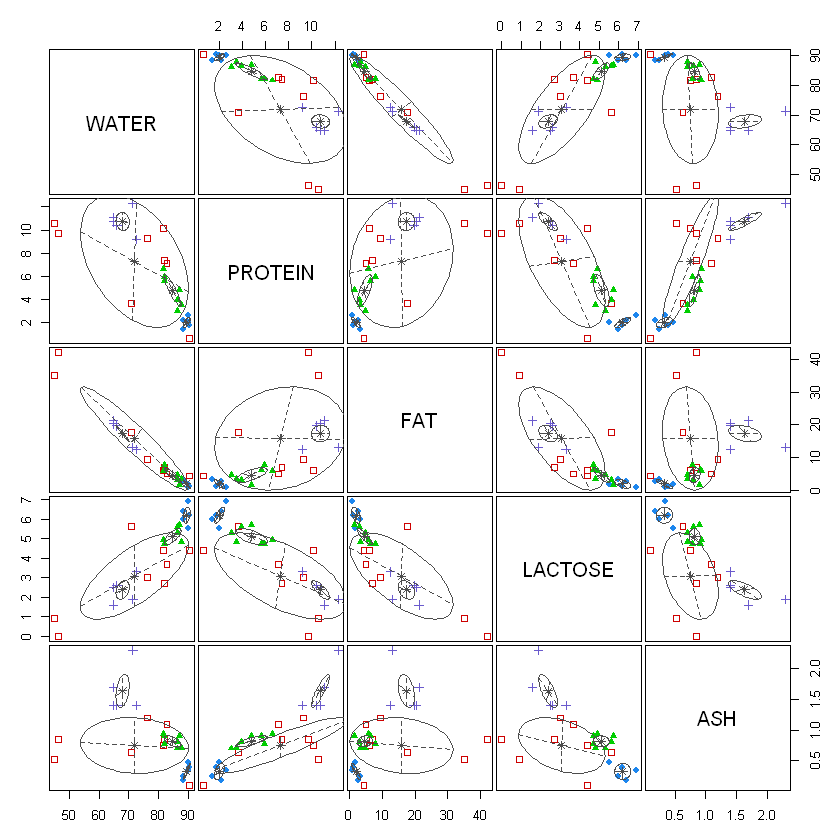

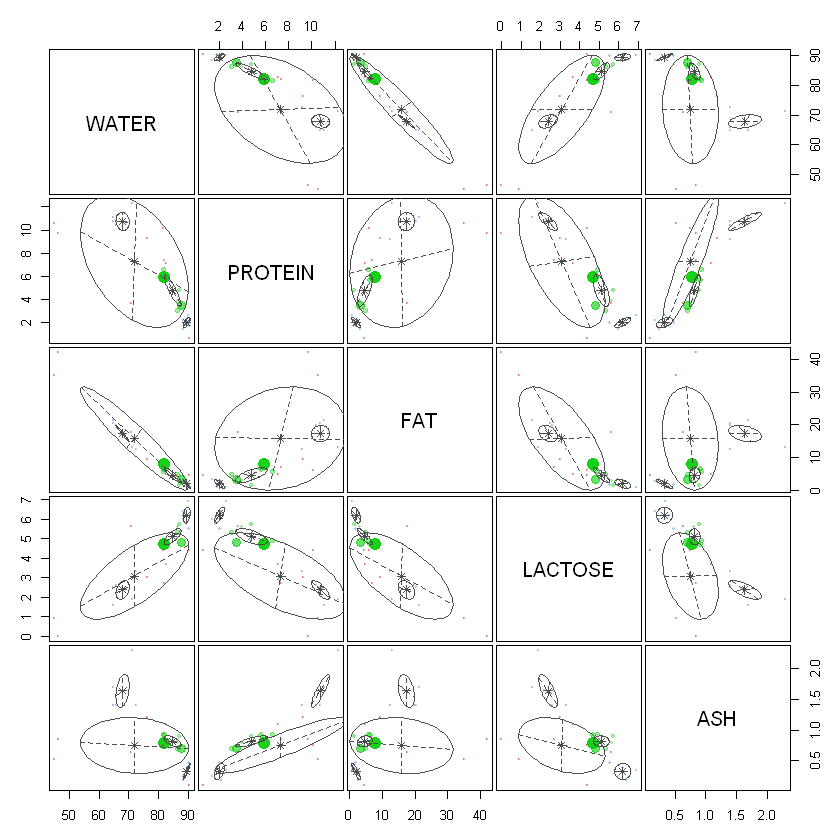

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

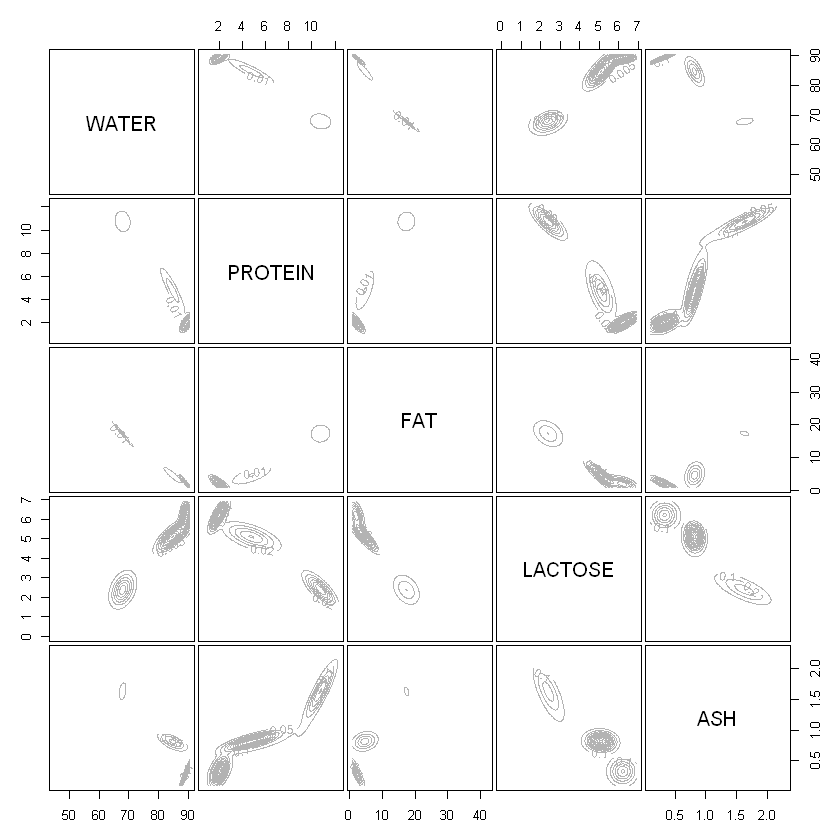

In [33]:
clus <-Mclust(datos,4)
summary(clus)
plot(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl



Ejercicio 1: 
a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 

# Respuesta

**a)** El método mclust se basa en modelos de mezclas gaussianas finitas parametrizadas, emplea el algoritmo EM (Expectativa-Maximización) como el criterio maximum likelihood para ajustar los determinados modelos con un número variado de clusters y selecciona el mejor en base al criterio Bayesian Information Criterion (BIC). Sus parámetros mas importantes son:
**Entrada:**

**data:** Vector, matriz o data frame numérico de observaciones.
**G:** Un vector entero que especifica el numero de clusters.
**modelNames:** Un vector compuesto de cadena de caracteres que indica los modelos que se ajustarán en la fase EM de agrupamiento.
**prior:** Permite la especificación de una conjugación previa sobre los medios y las variaciones a través de la función.
**control:** Una lista de parámetros de control para la fase EM.
**initialization:** Una lista que puede contener alguno de los componentes hcPairs, subset o noise.
**warn:** Un valor lógico que indica si se deben emitir ciertas advertencias (generalmente relacionadas con la singularidad).
**Verbose:** Un control lógico si se muestra una barra de progreso de texto durante el procedimiento de ajuste

**Salida:**

**call:** La llamada coincidente.
**data:** La matrix de datos de entrada.
**modelName:** Una cadena de caracteres que denota el modelo en el que se produce el BIC óptimo
**n:** El número de observaciones en los datos.
**d:** La dimensión de los datos.
**G:** El número óptimo de clusters.
**parameters:** Una lista de los siguientes parametros: pro, mean y variance.
**z:** Una matriz cuya [i, k] valor de entrada es la probabilidad de que la observación en los datos de prueba pertenezca a la clase k.

**b)** El primer gráfico, los resultados obtenidos nos indican el modelo en el que se produce el mayor valor valor del BIC, para este caso es VEV. El segundo gráfico nos ayuda a ver la distribución de los grupos haciendo una relación entre dos de las variables, cada grupo tiene un color, rojo, azul, morado y verde. Por ejemplo entre el agua y la protenia, se ve que los que poseen un alto nivel de agua y no tanto de proteina , los que poseen un valor alto de proteina y regular de agua estan en el grupo rojo y morado y finalmente los que poseen un bajo nivel de agua y alto de proteina están de color verde. Así cada grafico indica el grupo de los datos segun el nivel de las variables.

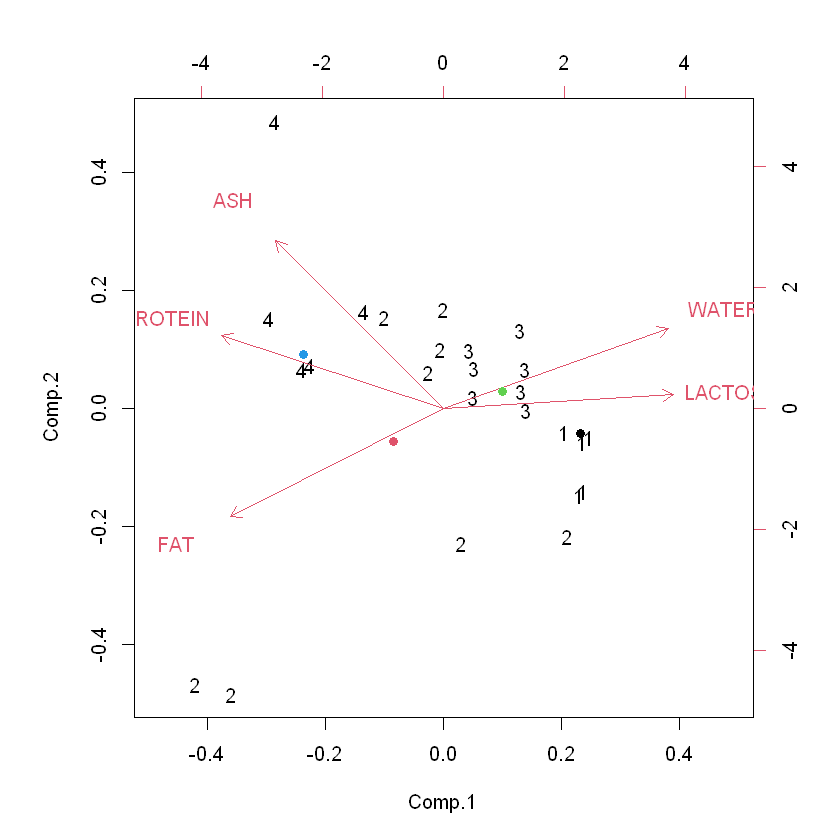

In [34]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

Ejercicio 2: 

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

# Respuesta

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 9 components: 

 log-likelihood  n  df       BIC       ICL
       69.49069 25 148 -337.4122 -337.4122

Clustering table:
1 2 3 4 5 6 7 8 9 
3 3 6 3 2 1 1 4 2 

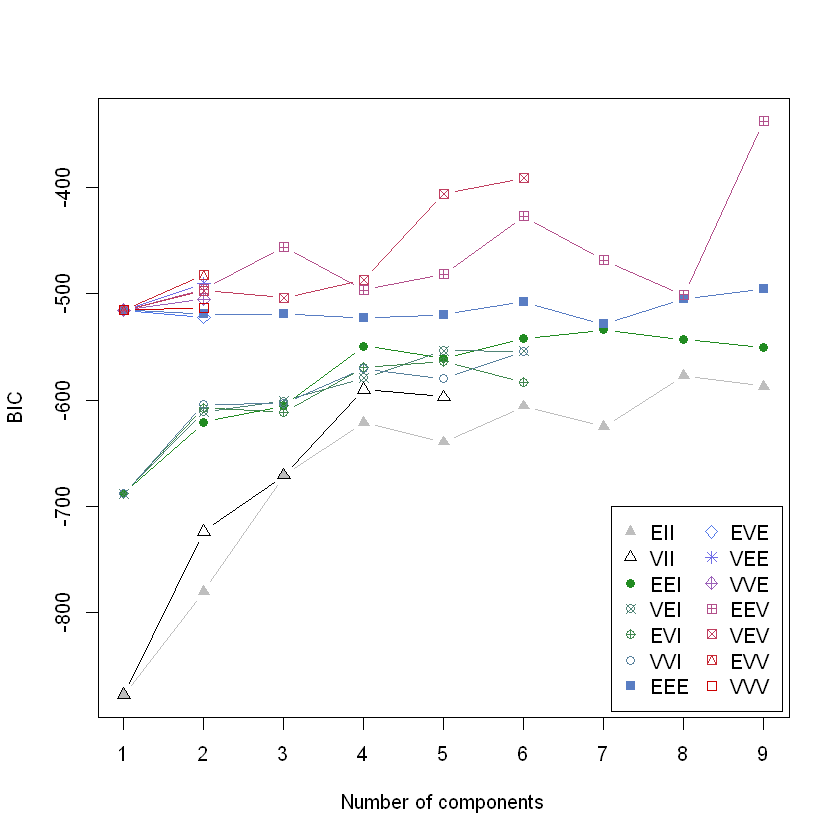

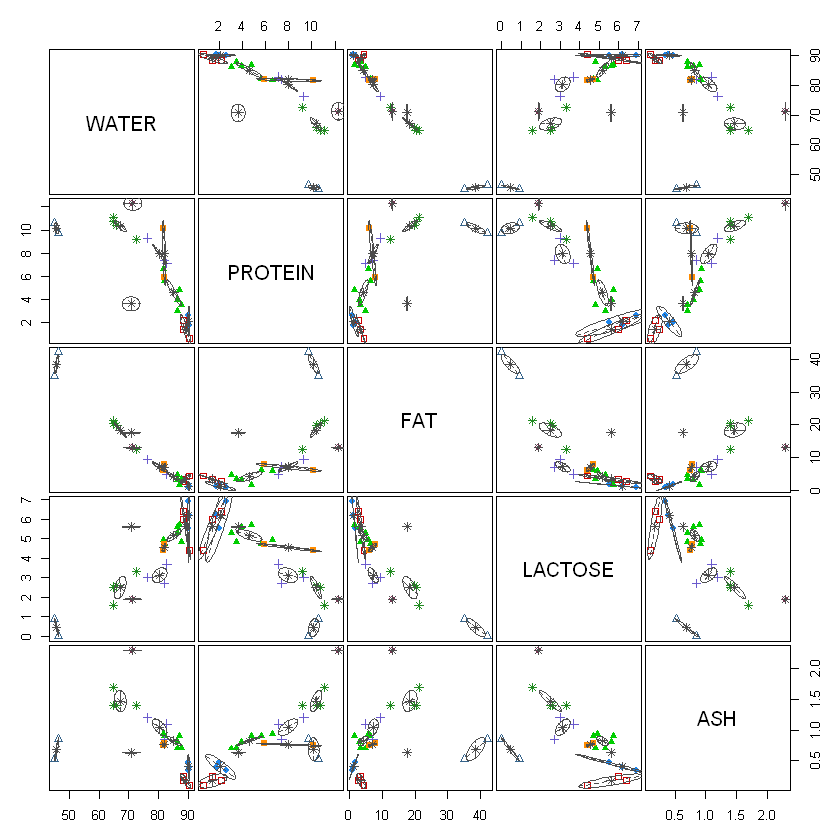

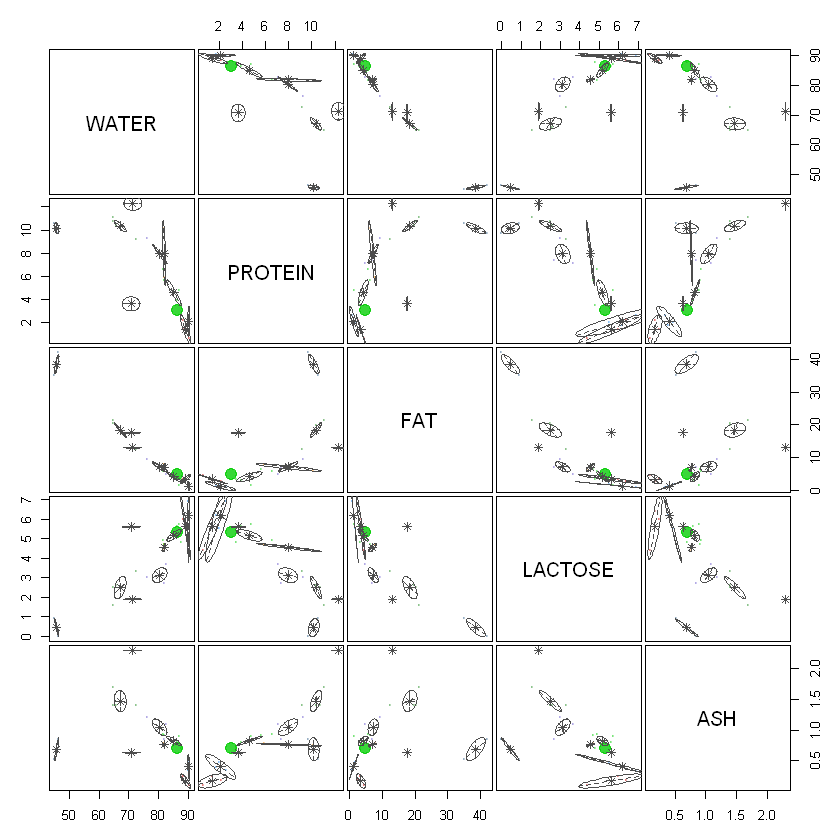

'Mclust' model object: (EEV,9) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
90.13333,2.100000,1.400000,6.200000,0.4066667
89.10000,1.400000,3.566667,5.600000,0.1733333
85.15000,4.566667,4.233333,5.166667,0.8250000
80.33333,7.933333,7.266667,3.133333,1.0500000
81.85000,8.000000,7.100000,4.550000,0.7650000
70.70000,3.600000,17.600000,5.600000,0.6300000
71.30000,12.300000,13.100000,1.900000,2.3000000
67.00000,10.350000,18.450000,2.500000,1.4750000
45.65000,10.150000,38.450000,0.450000,0.6900000


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          2          2          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         5          4          5          3          3          1          4 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          4          6          7          8          8 
  REINDEER      WHALE       SEAL    DOLPHIN 
         8          8          9          9

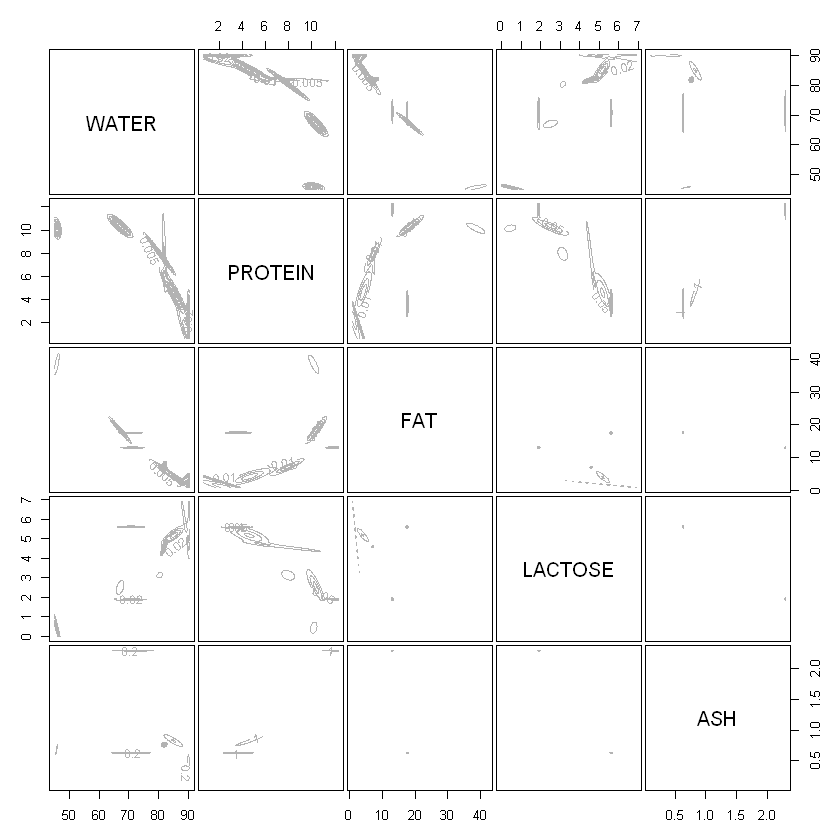

In [35]:
#a)si no se le especifica en numero de grupos, el algoritmo por defecto usa el BIC
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

**b**) Si lo comparamos con el método k-means visto en el notebook anterior, vemos que los grupos están mejor distribuidos con éste  algoritmo ya que, por ejemplo, en k-means habia un grupo que contenia a los caballos y monos en el mismo grupo lo cual era un poco confuso, y ahora con este algoritmo de agrupamiento el caballo solo estaba en el mismo grupo con el burro, lo cual tiene mucho mas sentido 

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

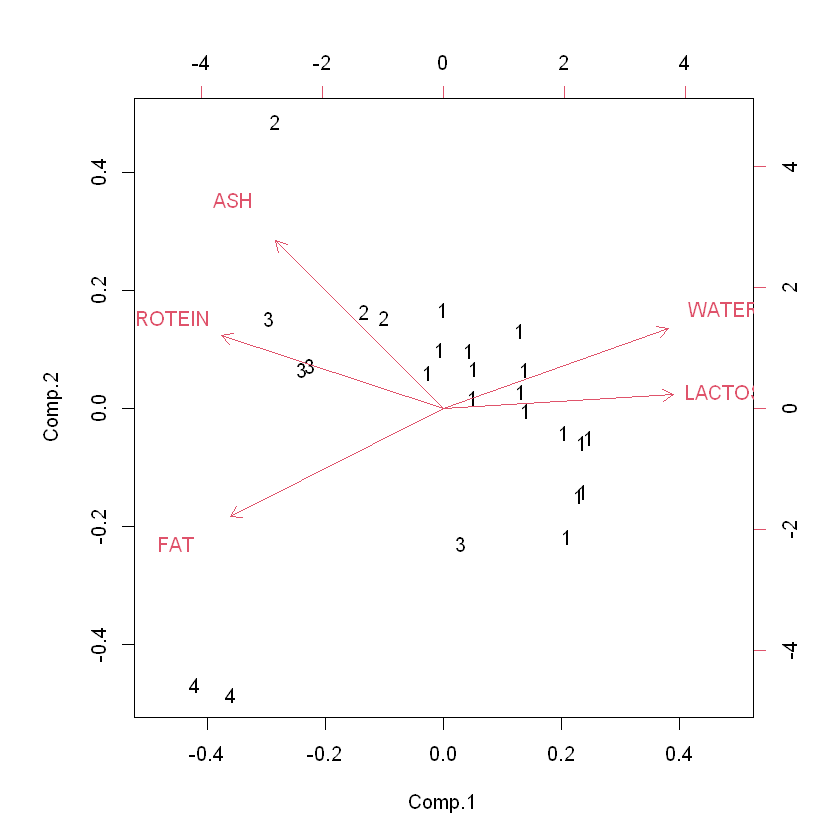

In [36]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

Ejercicio 3: 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

# Respuesta

**a)** Para la función ‘hclust’, se requieren los valores de distancia que se pueden calcular en R utilizando la función ‘dist’. La medida predeterminada para la función dist es ‘Euclidiana’, sin embargo, puede cambiarla con el argumento del método. Con esto, también necesitamos especificar el método de vinculación que queremos usar (es decir, “completo”, “promedio”, “único”). Los parámetros mas importantes son:

**Entrada:**

**d:** Estructura de distancia euclidiana.
**method:** La aglomeración del método a usar, puede ser single, complete, average, entre otros.
**members:** Null o un vector con tamaño de longitud d.
**x:** Objeto del tipo producido por hclust.

**Salida:**

**merge:** una matriz n − 1 por 2. La fila i de fusión describe la fusión de clústeres en el paso i de la agrupación. Si un elemento j en la fila es negativo, entonces la observación −j se fusionó en esta etapa. Si j es positivo, entonces la fusión se realizó con el grupo formado en la etapa (anterior) j del algoritmo. Por lo tanto, las entradas negativas en combinación indican aglomeraciones de singletons, y las entradas positivas indican aglomeraciones de no singletons.
**height:** un conjunto de n − 1 valores reales (no decrecientes para árboles ultramétricos). La altura de agrupamiento: es decir, el valor del criterio asociado con el método de agrupamiento para la aglomeración particular.
**order:** un vector que proporciona la permutación de las observaciones originales adecuadas para el trazado, en el sentido de que un diagrama de clúster que utiliza este orden y la fusión de la matriz no tendrá cruces de las ramas.

**b**) En éste gráfico podemos observar que la mayoria de las observaciones se agrupan en el grupo uno que son los mamíferos que tienen mas lactosa y agua en sus leches mientras que los del grupo 2 poseen mas "ash", y finalmente los que pertenecen al grupo 3, en su mayoria, tienen mas proteinas aunque vemos una observación que se escapa de las variable proteina, ésta puede ser una observación atípica en comparación a las demas.

**c)**

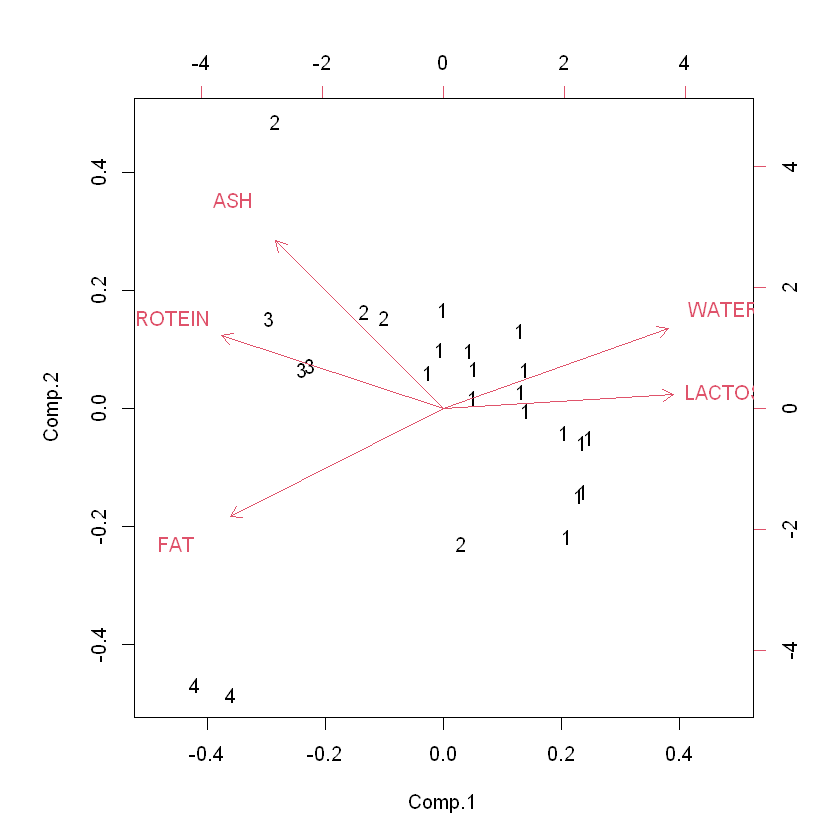

In [37]:
res4 <- hclust(dist(datos), method = "centroid")
biplot(res, xlabs= cutree(res4,4))

Si cambiamos el método a centroide, vemos que la observación atípica se cambia al grupo 2 debido a que la forma en como calcula las distancia la cambiamos, los resultados obtenidos no son los mismos.

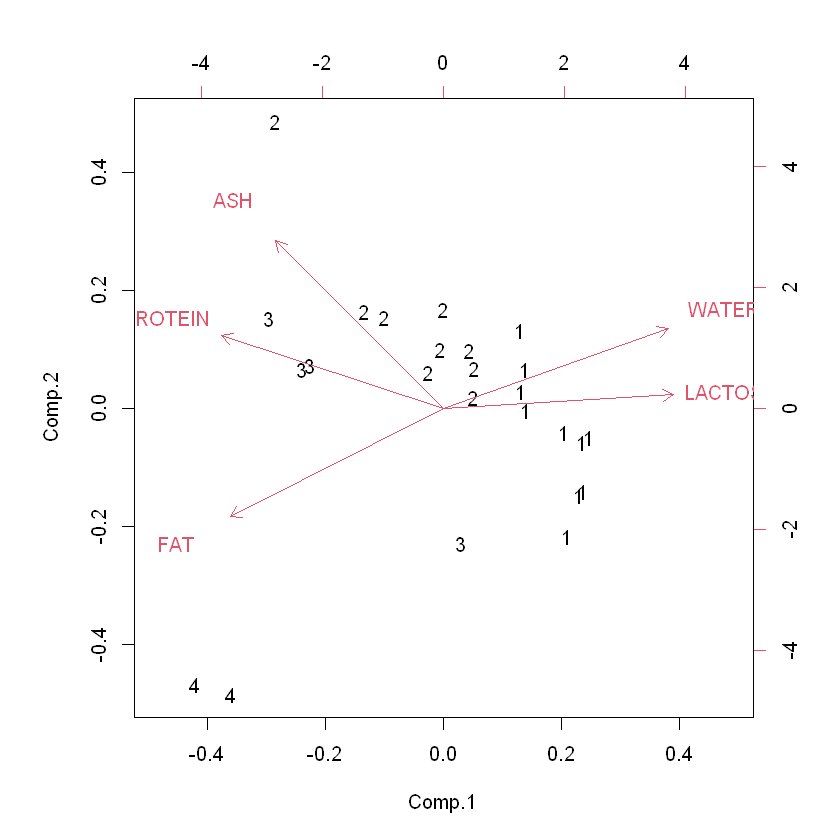

In [38]:
res5 <- hclust(dist(datos), method = "median")
biplot(res, xlabs= cutree(res5,4))

Ahora vemos que gran parte de las observaciones que pertenecian al grupo 1 se cambiaron al grupo 2 nuevamente debido al cambio en el metodo de la función hclust.

Ejercicio 4: 

a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv. Interprete sus resultados.

b) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD). Calcule alguna de las medidas de calidad estudiadas, para cada uno de los análisis realizado en (a). Discuta sus resultados.

# Respuesta

# K-MEANS

    sepal.length sepal.width petal.length petal.width
1            5.1         3.5          1.4         0.2
2            4.9         3.0          1.4         0.2
3            4.7         3.2          1.3         0.2
4            4.6         3.1          1.5         0.2
5            5.0         3.6          1.4         0.2
6            5.4         3.9          1.7         0.4
7            4.6         3.4          1.4         0.3
8            5.0         3.4          1.5         0.2
9            4.4         2.9          1.4         0.2
10           4.9         3.1          1.5         0.1
11           5.4         3.7          1.5         0.2
12           4.8         3.4          1.6         0.2
13           4.8         3.0          1.4         0.1
14           4.3         3.0          1.1         0.1
15           5.8         4.0          1.2         0.2
16           5.7         4.4          1.5         0.4
17           5.4         3.9          1.3         0.4
18           5.1         3.5

  sepal.length    sepal.width     petal.length    petal.width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

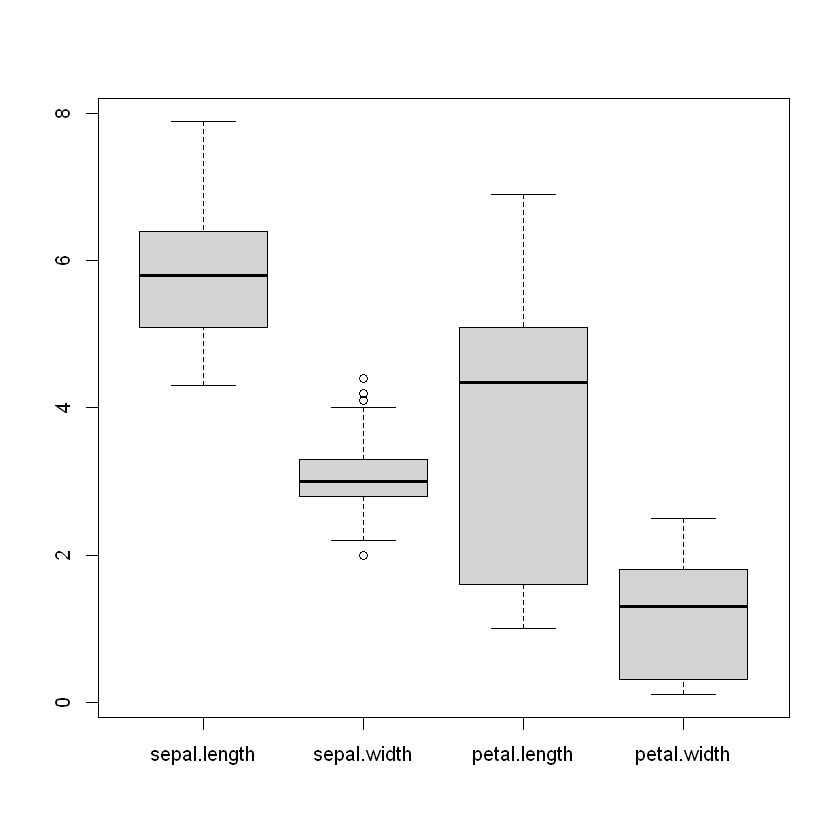

In [39]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos_iris <-read.table("iris.csv",row.names=NULL,dec=",",header=TRUE,sep=";")
datos_iris$variety <- NULL
print(datos_iris)
summary(datos_iris)
boxplot(datos_iris)

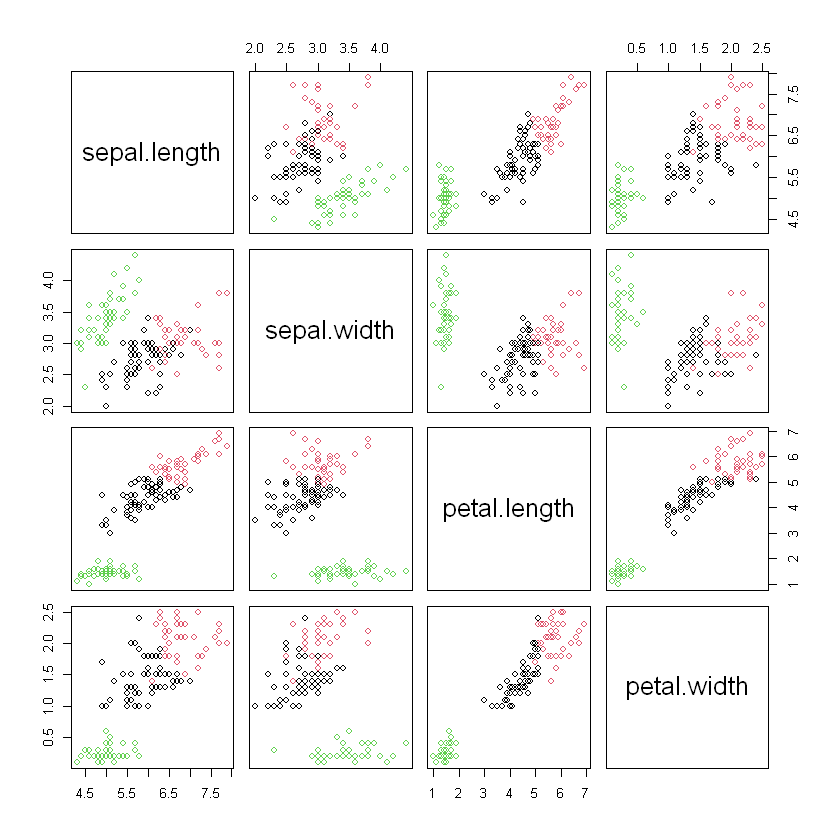

In [40]:
#ingresar valor de k0 
k=3
cl<-kmeans(datos_iris,k,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos_iris,col=cl$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4
1,0.612400,-0.6004677,-0.02254389,-0.02156929
2,1.928128,0.5995427,-0.01958510,0.01105943
3,-2.224753,0.2889275,0.04283910,0.01834076


K-means clustering with 3 clusters of sizes 62, 38, 50

Cluster means:
  sepal.length sepal.width petal.length petal.width
1     5.901613    2.748387     4.393548    1.433871
2     6.850000    3.073684     5.742105    2.071053
3     5.006000    3.428000     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

Within cluster sum of squares by cluster:
[1] 39.82097 23.87947 15.15100
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

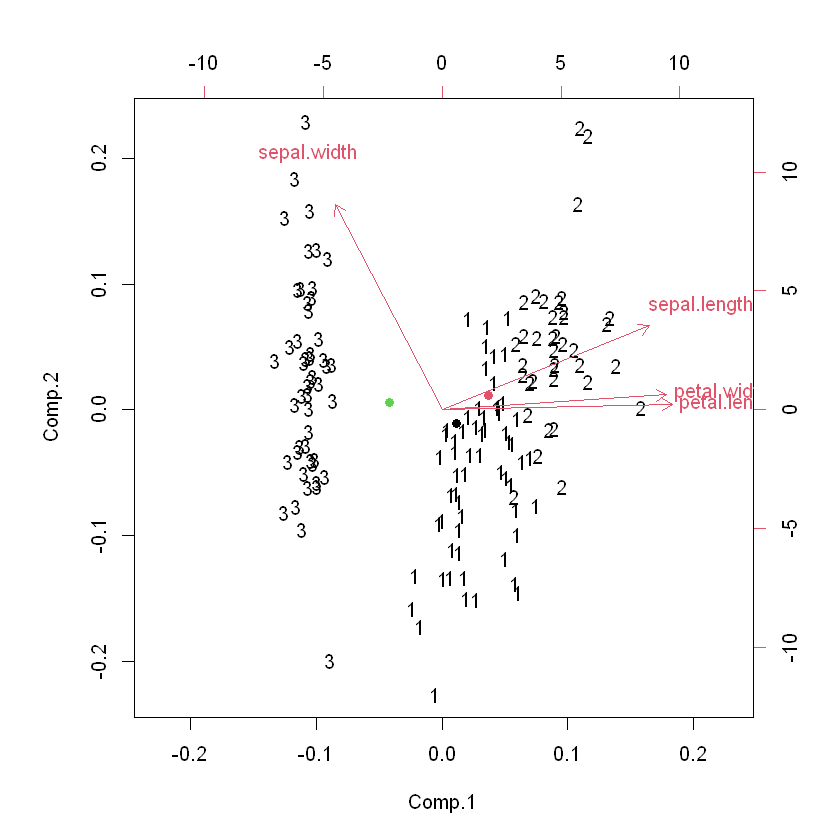

In [41]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos_iris, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k,pch=19)

# GMM

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 3 components: 

 log-likelihood   n df       BIC       ICL
       -186.074 150 38 -562.5522 -566.4673

Clustering table:
 1  2  3 
50 45 55 

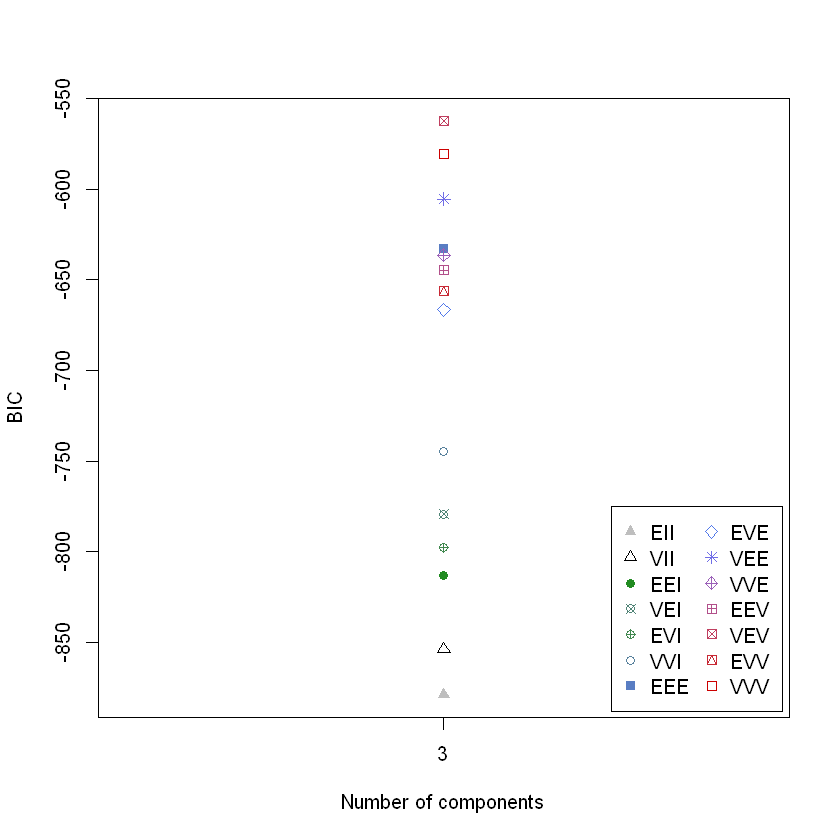

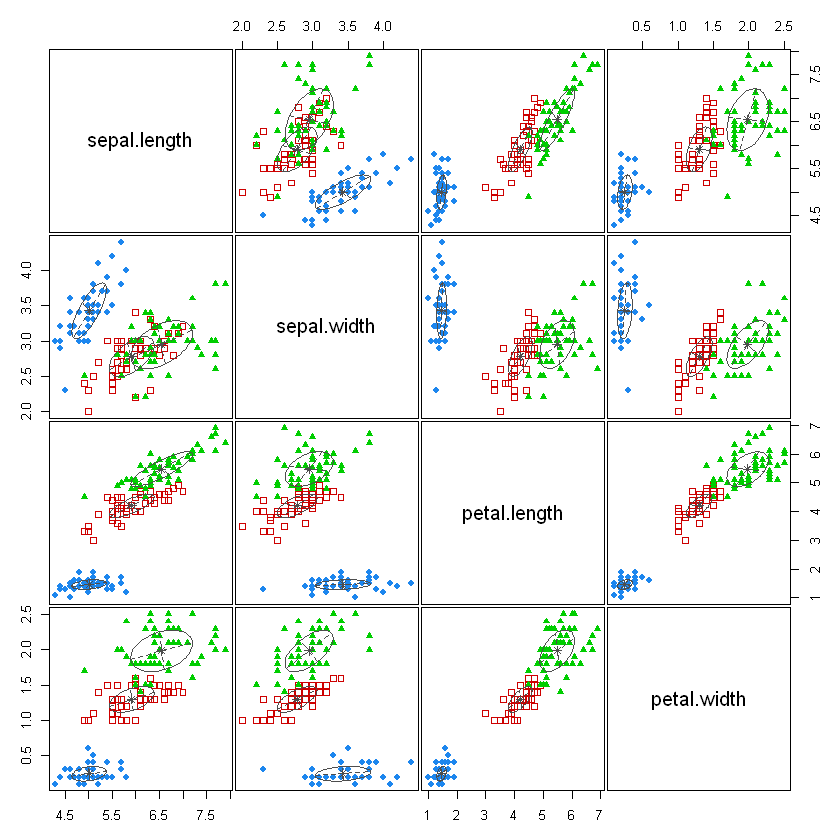

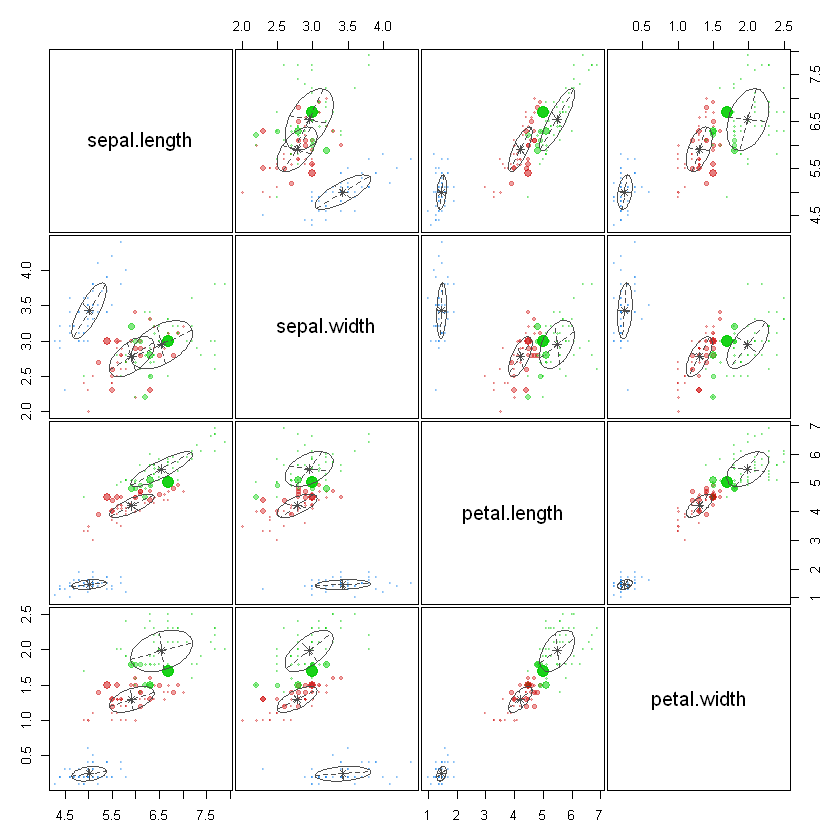

'Mclust' model object: (VEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

sepal.length,sepal.width,petal.length,petal.width
5.006000,3.428000,1.462000,0.246000
5.915044,2.777451,4.204002,1.298935
6.546807,2.949613,5.482252,1.985523


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

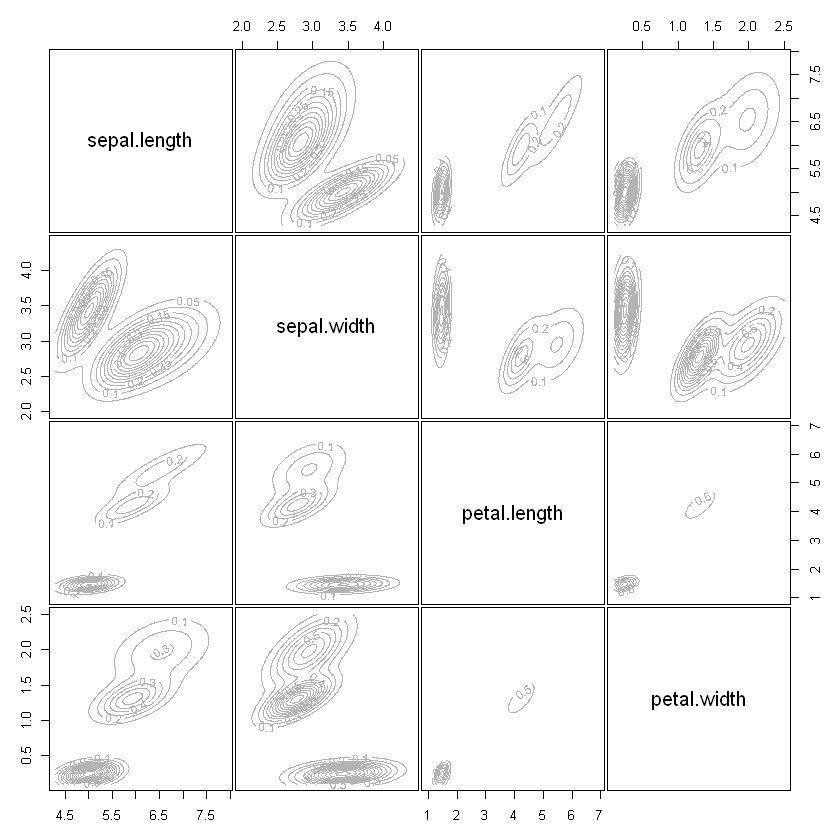

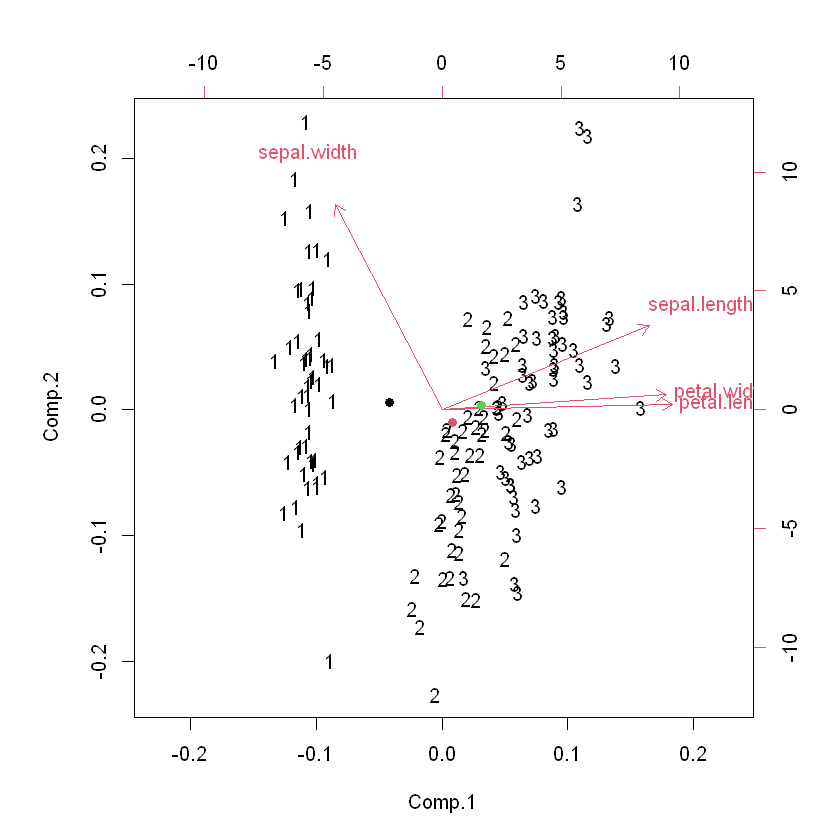

In [42]:
#a)si no se le especifica en numero de grupos, el algoritmo por defecto usa el BIC
clus <-Mclust(datos_iris,3)
summary(clus)
plot(clus)
clus
cl2 <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl2

res1<- princomp(datos_iris, cor=TRUE)
res3 <- predict(res1,centers)

biplot(res1,xlabs=cl2)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res3[,1:2],col=1:9,pch=19)

# Análisis jerarquico

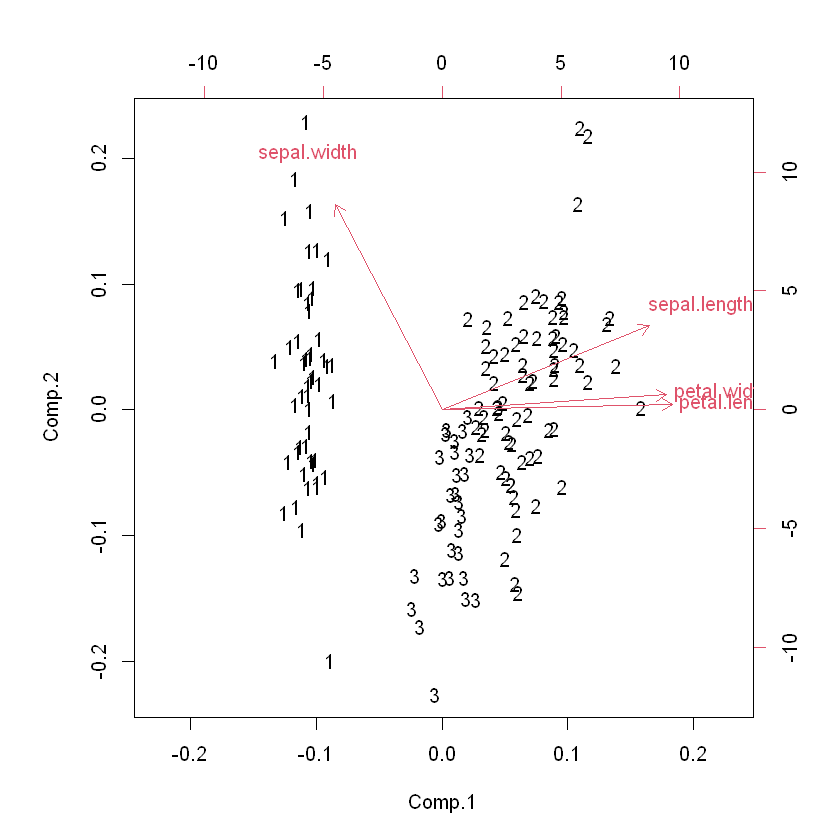

In [43]:
res4 <- hclust(dist(datos_iris))
res10<-cutree(res4,3)
biplot(res1, xlabs= res10)

   Como vimos en el notebook anterior, el numero de k óptimos para el algoritmo k-means es 3, por lo que ahora lo ponemos manualmente. De todos los gráficos podemos observar qué tan relacionados están las distintas variables, notamos que el ancho y largo del pétalo están fuertemente relacionados entre si, y el largo del sépalo tiende a estar mas relacionado con las dos características del pétalo. Por otra parte el ancho del sépalo podemos decir que no está relacionado con ninguna de las otras variables ya que se ve que su flecha es ortogonal a las demás. En cuanto al rendimiento de los algoritmos, deduzco que el que mejor agrupa los datos es el de GMM ya que divide los datos en 2 grupos, el primero corresponde a las observaciones que poseen un mayor ancho del sepalo, y el otro grupo corresponde a las observaciones que poseen mayor ancho y largo de su petalo y un sepalo mas largo (los cuales están relacionados entre si). El análisis jerárquico también agrupa los datos en 2 grupos, pero vemos que la distribución de los grupos no es tan buena, ya que hay varias observaciones que tienden a estar en el grupo 2 pero que pertenecen al grupo 1. Mientras que el k-means agrupa los datos en 3 grupos, separa en un grupo distinto las observaciones que poseen un sepalo mas largo, cuando lo ideal sería agrupar en el mismo grupo a las observaciones con variables relacionadas entre si.

**b)**

In [44]:
purity <- function(clust, total, k){
    cuota <- total / k
    lista <- rep(0,k)
    suma<-0
    t<- 0
    l<-1
    for(j in l:k){
        for (i in 1:(cuota)){
            for (p in 1:k){
                if(clust[l]==p){
                    lista[p] = sum(lista[p],1)
                }
            }
            l = l+1
        }
        for (p in 1:k){
            if (p==1){
                t = lista[p]
            }
            else{
                if(lista[p] > lista[p-1]){
                    t = lista[p]
                }
            }
        }
        suma <- suma + t
        lista <- rep(0,k)
    }
    return(suma/total)

}


cat("Purity K-Means: ", purity(cl$cluster, dim(datos_iris)[1], k), "\n")
cat("Purity GMM: ", purity(clus$classification, dim(datos_iris)[1], k), "\n")
cat("Purity Análisis jerárquico: ", purity(res10, dim(datos_iris)[1], k), "\n")

Purity K-Means:  0.8933333 
Purity GMM:  0.9666667 
Purity Análisis jerárquico:  0.84 


Hice un algoritmo que calcula el nivel de pureza de los cluster y lo apliqué para cada algoritmo, como vemos el que tiene un mejor nivel de pureza es el agrupamiento mediante GMM con un 97% aprox. lo sigue el k-means con un 89% y por último el Análisis Jerárquico con un 84%. Cabe destacar que estos resultados vienen de la comparación de los algoritmos con la misma cantidad de grupos, que en este caso es 3.